# Comments Classifier Project

## DISCLAIMER: The dataset contains text that may be considered profane, vulgar, or offensive.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Let's Consider Train Dataset

In [3]:
# # loading dataset
# df = pd.read_csv('malignant_comments_train.csv', encoding='latin1')
# df

In [4]:
# loading dataset
path = '/content/drive/MyDrive/CSV files/malignant_comments_train.csv'
df = pd.read_csv(path, encoding='latin1')
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
80809,07:o like to waty judge as bad-faith ould,"i wheatione""",0,ughter s Or(~31Dd,0,0e somee ab0b6 ATd you8P,NaN,NaN
80810,"n'tne y.""",0,0,0,0ly riclu(rich apec8er CmCurrie Dgity yo disst...,I WANT TO GE,0,to
80811,chane a,nadpif cenr,NaN,NaN,NaN,NaN,NaN,NaN
80812,Like aDoe,Wuestmethe,0,ug,0T 7cuseoe,Jaks as sre of ang taos took as no harm25d2b,"Oh soosider Â·âf""""","0 for your professionag taosort to soosite o""""..."


### Features Description:
        
        id: A unique id aligned with each comment text. 
        comment_text: It includes the comment text. 
        malignant: It is a column with binary values depicting which comments are malignant in nature. 
        highly_malignant: Binary column with labels for highly malignant text. 
        rude: Binary column with labels for comments that are rude in nature. 
        threat: Binary column with labels for threatening context in the comments. 
        abuse: Binary column with labels with abusive behaviour.
        loathe: Label to comments that are full of loathe and hatred.

In [5]:
# number of rows/instances and columns/features present in the dataset
df.shape

(80814, 8)

In [6]:
# columns names
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

## Data Cleaning

In [7]:
# number of unique values present in 'malignant' column
df['malignant'].unique()

array([0, 1, '0', '1', nan, 'simO like tn 7cuserspase'], dtype=object)

In [8]:
# replacing '0' and '1' with 0 and 1
df['malignant'] = df['malignant'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['malignant'] = df['malignant'].replace('simO like tn 7cuserspase',np.nan)

df['malignant'].unique()

array([ 0.,  1., nan])

In [9]:
# number of unique values present in 'highly_malignant' column
df['highly_malignant'].unique()

array([0, 1, '0', '1', nan, 'ughter s Or(~31Dd', 'ug'], dtype=object)

In [10]:
# replacing '0' and '1' with 0 and 1
df['highly_malignant'] = df['highly_malignant'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['highly_malignant'] = df['highly_malignant'].replace('ughter s Or(~31Dd',np.nan).replace('ug',np.nan)

df['highly_malignant'].unique()

array([ 0.,  1., nan])

In [11]:
# number of unique values present in 'rude' column
df['rude'].unique()

array([0, 1, '0', '1', nan,
       '0ly riclu(rich apec8er CmCurrie Dgity yo disst aoryb""Inleg4',
       '0T 7cuseoe'], dtype=object)

In [12]:
# replacing '0' and '1' with 0 and 1
df['rude'] = df['rude'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['rude'] = df['rude'].replace('0ly riclu(rich apec8er CmCurrie Dgity yo disst aoryb""Inleg4',np.nan).replace('0T 7cuseoe',np.nan)

df['rude'].unique()

array([ 0.,  1., nan])

In [13]:
# number of unique values present in 'threat' column
df['threat'].unique()

array([0, 1, '0', '1', nan, '0e somee ab0b6 ATd you8P', 'I WANT TO GE',
       ' Jaks as sre of ang taos took as no harm25d2b'], dtype=object)

In [14]:
# replacing '0' and '1' with 0 and 1
df['threat'] = df['threat'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['threat'] = df['threat'].replace('0e somee ab0b6 ATd you8P',np.nan).replace('I WANT TO GE',np.nan).replace(' Jaks as sre of ang taos took as no harm25d2b',np.nan)

df['threat'].unique()

array([ 0.,  1., nan])

In [15]:
# number of unique values present in 'abuse' column
df['abuse'].unique()

array([0, 1, '0', '1', nan, ' wfill out your bsotos I repoth',
       'Oh soosider  Â·â\x9cf""'], dtype=object)

In [16]:
# replacing '0' and '1' with 0 and 1
df['abuse'] = df['abuse'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['abuse'] = df['abuse'].replace(' wfill out your bsotos I repoth',np.nan).replace('Oh soosider  Â·â\x9cf""',np.nan)

df['abuse'].unique()

array([ 0.,  1., nan])

In [17]:
# number of unique values present in 'loathe' column
df['loathe'].unique()

array([0, 1, '0', '1', nan, "alsod in 70ain extesctual pso6bson's ap",
       'to ',
       '0 for your professionag taosort to soosite o"" byl7Hf you8P'],
      dtype=object)

In [18]:
# replacing '0' and '1' with 0 and 1
df['loathe'] = df['loathe'].replace('0',0).replace('1',1)

# replacing text (unwanted text) with nan
df['loathe'] = df['loathe'].replace("alsod in 70ain extesctual pso6bson's ap",np.nan).replace('to ',np.nan).replace('0 for your professionag taosort to soosite o"" byl7Hf you8P',np.nan)

df['loathe'].unique()

array([ 0.,  1., nan])

In [19]:
# columns Non-Null Count and DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80814 entries, 0 to 80813
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                80814 non-null  object 
 1   comment_text      80813 non-null  object 
 2   malignant         80808 non-null  float64
 3   highly_malignant  80806 non-null  float64
 4   rude              80806 non-null  float64
 5   threat            80804 non-null  float64
 6   abuse             80805 non-null  float64
 7   loathe            80804 non-null  float64
dtypes: float64(6), object(2)
memory usage: 4.9+ MB


In [20]:
# columns Null Count
df.isnull().sum()

id                   0
comment_text         1
malignant            6
highly_malignant     8
rude                 8
threat              10
abuse                9
loathe              10
dtype: int64

In [21]:
# dropping the NaN values
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [23]:
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

# converting columns/classes Dtype from float to int 
for col in cols:
    df[col] = df[col].astype(int)

In [24]:
# removing any emojis present in the comment_text
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [25]:
# checking Dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80804 entries, 0 to 80803
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                80804 non-null  object
 1   comment_text      80804 non-null  object
 2   malignant         80804 non-null  object
 3   highly_malignant  80804 non-null  object
 4   rude              80804 non-null  object
 5   threat            80804 non-null  object
 6   abuse             80804 non-null  object
 7   loathe            80804 non-null  object
dtypes: object(8)
memory usage: 5.5+ MB


In [26]:
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

# converting columns/classes Dtype from object to int 
for col in cols:
    df[col] = df[col].astype(int)

In [27]:
# converting all 'comments' to lower case
df['comment_text']=df['comment_text'].str.lower()

# replacing 'numbers' (if any) with 'space'
df['comment_text'] = df['comment_text'].str.replace(r'\d+(\.\d+)?', ' ')

# removing punctuation
df['comment_text'] = df['comment_text'].str.replace(r'[^\w\d\s]', '')

# replacing 'wide-space' between words with a single space
df['comment_text'] = df['comment_text'].str.replace(r'\s+', ' ')

# removing 'underscore'
df['comment_text'] = df['comment_text'].str.replace(r'_', '')

# removing leading and trailing wide-space
df['comment_text'] = df['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [28]:
# for analysis purpose only
# checking the 'comment_text' length
df['comment_text_length']=df['comment_text'].str.len()

In [29]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text_length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,245
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0,86
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0,227
3,0001b41b1c6bb37e,more i cant make any real suggestions on impro...,0,0,0,0,0,0,594
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,62


In [30]:
# importing PorterStemmer
from nltk.stem import PorterStemmer

# importing stopwords
from nltk.corpus import stopwords

In [31]:
import nltk
nltk.download('wordnet')

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
# stop words
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
# removing 'stop words' and stemming words using PorterStemmer

df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
                PorterStemmer().stem(words) for words in x.split() 
                if words not in stop_words))

In [34]:
# for analysis purpose only
df['cleaned_comment']=df['comment_text'].str.len()

In [35]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_text_length,cleaned_comment
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,245,149
1,000103f0d9cfb60f,daww match background colour im seemingli stuc...,0,0,0,0,0,0,86,70
2,000113f07ec002fd,hey man im realli tri edit war guy constantli ...,0,0,0,0,0,0,227,121
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0,594,319
4,0001d958c54c6e35,sir hero chanc rememb page that,0,0,0,0,0,0,62,31


In [36]:
print('Original Length:',df['comment_text_length'].sum())
print('Cleaned Length :',df['cleaned_comment'].sum())
print('Difference     :',df['comment_text_length'].sum()-df['cleaned_comment'].sum())

Original Length: 30047792
Cleaned Length : 17926693
Difference     : 12121099


## EDA

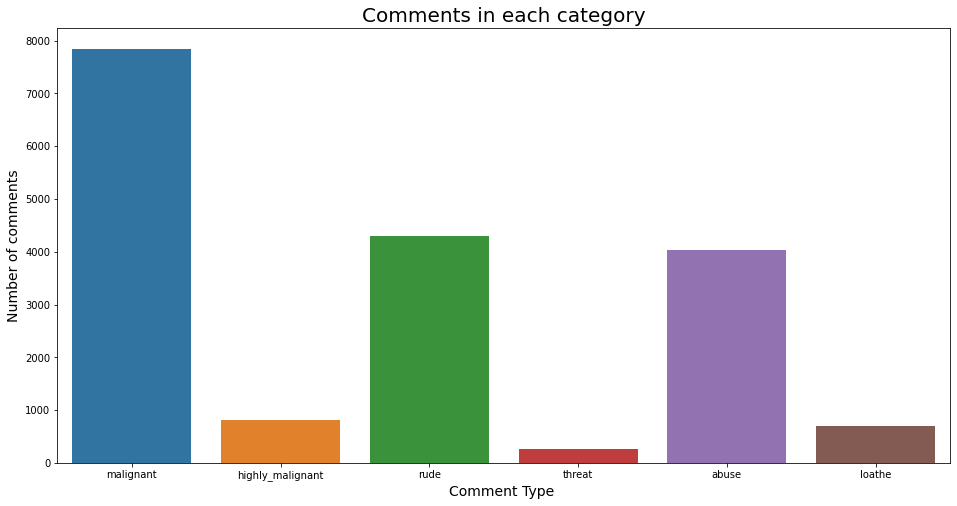

In [37]:
# number of comments under each label

plt.figure(figsize=(16,8))
sns.barplot(df.columns[2:8], df.iloc[:,2:8].sum())
plt.title("Comments in each category", fontsize=20)
plt.ylabel('Number of comments', fontsize=14)
plt.xlabel('Comment Type ', fontsize=14)
plt.show()

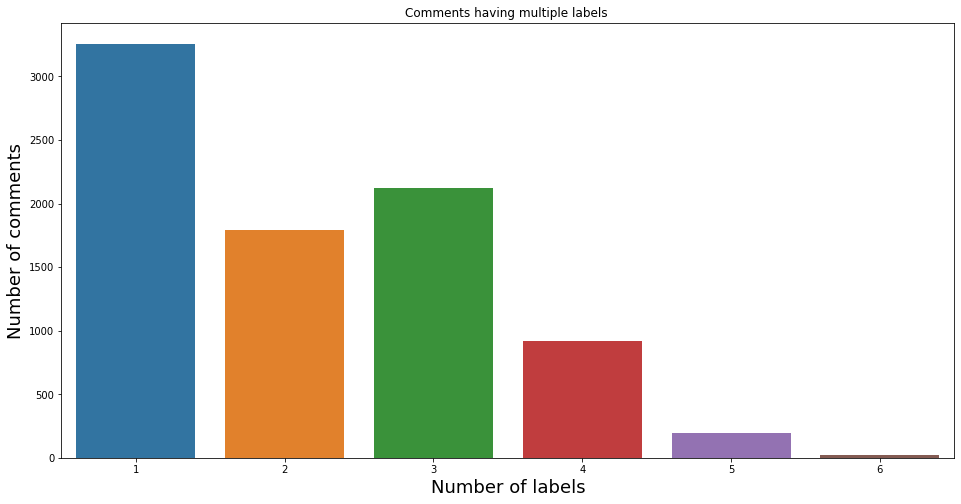

In [38]:
# Counting the number of comments having multiple labels

# summing up row wise
rowSums = df.iloc[:,2:8].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(16,8))
sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
plt.show()

In [39]:
# importing WordCloud
from wordcloud import WordCloud

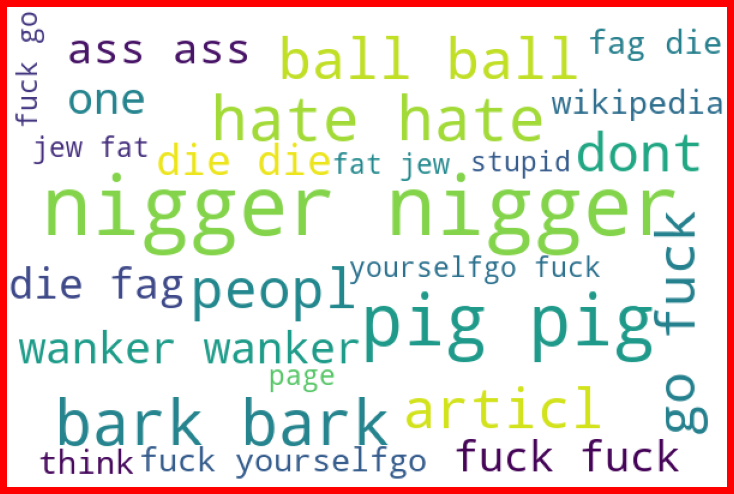

In [40]:
# cloud words in malignant text

ma = df['comment_text'][df['malignant']==1]
ma_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(ma))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ma_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

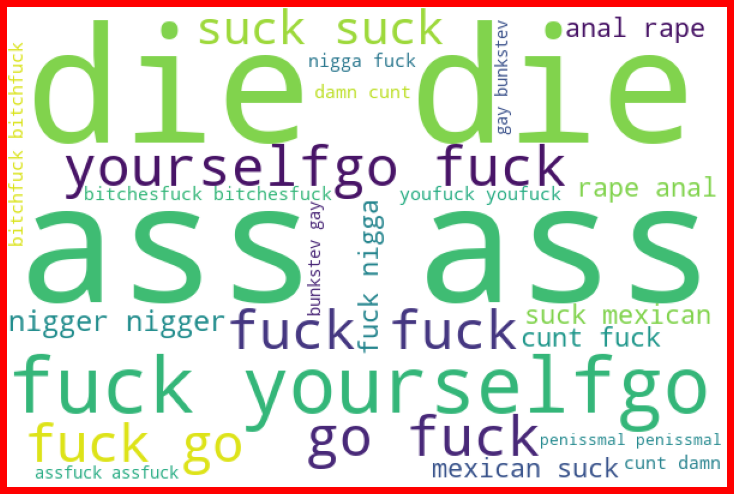

In [41]:
# cloud words in highly_malignant text

hm = df['comment_text'][df['highly_malignant']==1]
hm_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(hm))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(hm_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

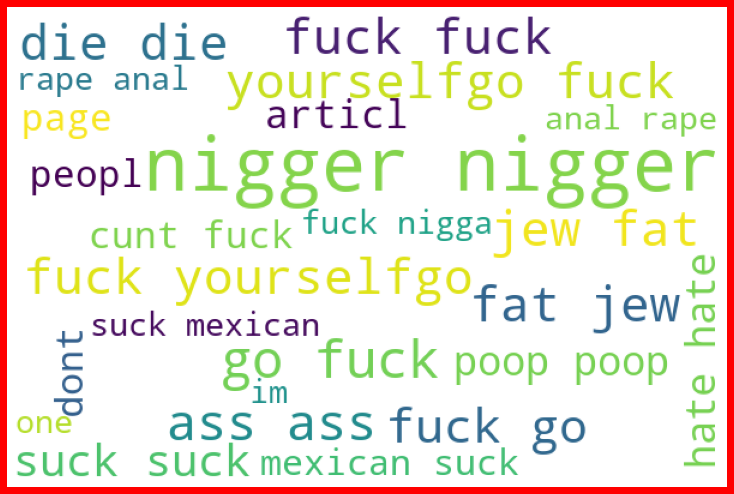

In [42]:
# cloud words in rude text

ru = df['comment_text'][df['rude']==1]
ru_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(ru))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ru_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

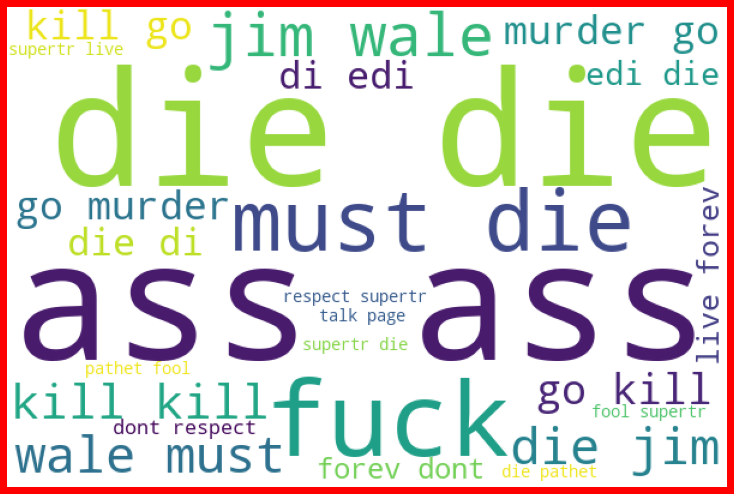

In [43]:
# cloud words in threat text

th = df['comment_text'][df['threat']==1]
th_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(th))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(th_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

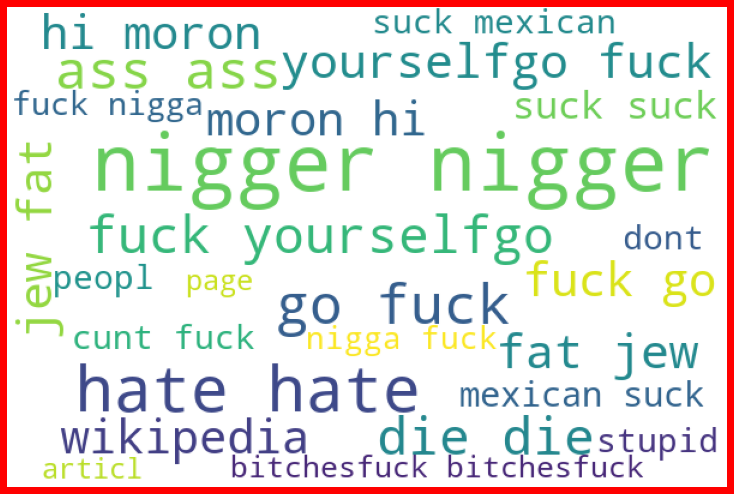

In [44]:
# cloud words in abuse text

ab = df['comment_text'][df['abuse']==1]
ab_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(ab))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ab_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

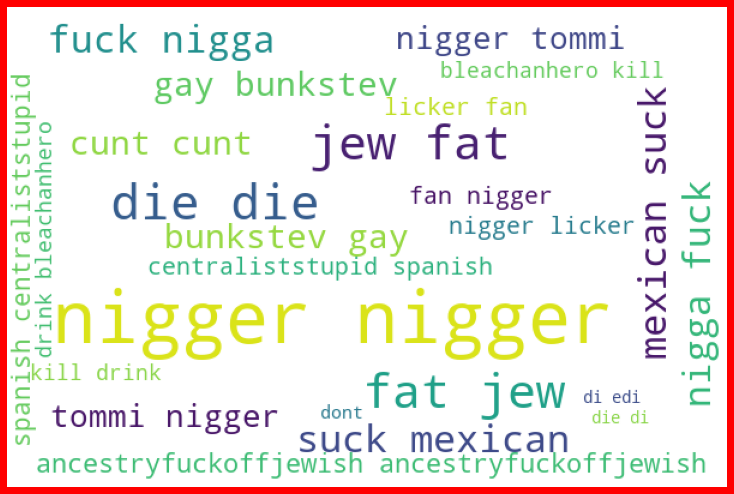

In [45]:
# cloud words in loathe text

lo = df['comment_text'][df['loathe']==1]
lo_cloud = WordCloud(width=600,height=400,background_color='white',max_words=25).generate(' '.join(lo))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(lo_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Model Training And Testing

In [46]:
# importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# importing models and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
# model object
tf_idf = TfidfVectorizer(max_features=3000)

# transforming text into features
features = tf_idf.fit_transform(df['comment_text'])

In [49]:
# splitting data
x = features
y = df.drop(['id','comment_text','comment_text_length','cleaned_comment'],axis=1)

In [50]:
# total number of classes
n_classes = y.shape[1]
n_classes

6

In [51]:
# splitting data into train set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [52]:
# models list
mod_list = [LogisticRegression(),SGDClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),
            RandomForestClassifier()]

## Finding The Best Model

In [53]:
for mod in mod_list:
    print(mod)
    ovr=OneVsRestClassifier(mod, n_jobs=-1) # OneVsRestClassifier object
    ovr.fit(x_train,y_train)
    y_pred=ovr.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    print(classification_report(y_test,y_pred))
    print('*****************************************************************************************')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score: 92.03504776991238
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1896
           1       0.54      0.25      0.34       203
           2       0.91      0.64      0.75      1044
           3       0.88      0.13      0.23        52
           4       0.79      0.51      0.62       979
           5       0.76      0.16      0.26       180

   micro avg       0.87      0.56      0.68      4354
   macro avg       0.80      0.38      0.49      4354
weighted avg       0.86      0.56      0.67      4354
 samples avg       0.05      0.05      0.05      4354

*******************************************

### Observations:
        From above it is evident that Logistic Regression model is performing better with an accuracy score of 92% to 94%.

In [54]:
lr = LogisticRegression()
ovr=OneVsRestClassifier(lr, n_jobs=-1) # OneVsRestClassifier object
ovr.fit(x_train,y_train)
y_pred=ovr.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print(classification_report(y_test,y_pred))

Accuracy score: 92.03504776991238
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1896
           1       0.54      0.25      0.34       203
           2       0.91      0.64      0.75      1044
           3       0.88      0.13      0.23        52
           4       0.79      0.51      0.62       979
           5       0.76      0.16      0.26       180

   micro avg       0.87      0.56      0.68      4354
   macro avg       0.80      0.38      0.49      4354
weighted avg       0.86      0.56      0.67      4354
 samples avg       0.05      0.05      0.05      4354



In [55]:
# cross_val_score
cv_score=cross_val_score(ovr,x,y,cv=8).mean()
print('Cross_val_score:',cv_score*100)

Cross_val_score: 91.75660421328739


In [56]:
# importing log_loss
from sklearn.metrics import log_loss

# predicted probabilities
y_pred_proba = ovr.predict_proba(x_test)
# log_loss
ll=log_loss(y_test,y_pred_proba)
ll

0.2764847721476803

## Hyper-parameter Tuning

In [57]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [58]:
parameters1 = {
    'estimator__penalty':['l1','l2','elasticnet','none'],
    'estimator__dual':[True,False]  
}

gscv1 = GridSearchCV(ovr, parameters1, scoring='accuracy')
gscv1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        random_state=N

In [59]:
parameters2 = {
    'estimator__fit_intercept':[True,False],
    'estimator__solver':['newton-cg','lbfgs','liblinear','sag','saga']   
}

gscv2 = GridSearchCV(ovr, parameters2, scoring='accuracy')
gscv2.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        random_state=N

In [60]:
print(gscv1.best_params_,
      gscv2.best_params_)

{'estimator__dual': False, 'estimator__penalty': 'l2'} {'estimator__fit_intercept': True, 'estimator__solver': 'liblinear'}


In [61]:
lr = LogisticRegression(penalty='l2', dual=False, fit_intercept=True, solver='liblinear')
ovr=OneVsRestClassifier(lr, n_jobs=-1) # OneVsRestClassifier object
ovr.fit(x_train,y_train)
y_pred=ovr.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print(classification_report(y_test,y_pred))

Accuracy score: 92.03504776991238
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1896
           1       0.55      0.25      0.34       203
           2       0.91      0.64      0.75      1044
           3       0.88      0.13      0.23        52
           4       0.79      0.51      0.62       979
           5       0.75      0.15      0.25       180

   micro avg       0.87      0.56      0.68      4354
   macro avg       0.80      0.38      0.49      4354
weighted avg       0.86      0.56      0.67      4354
 samples avg       0.05      0.05      0.05      4354



In [62]:
# importing metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [63]:
# to array like format
Y = np.array(y_test)
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

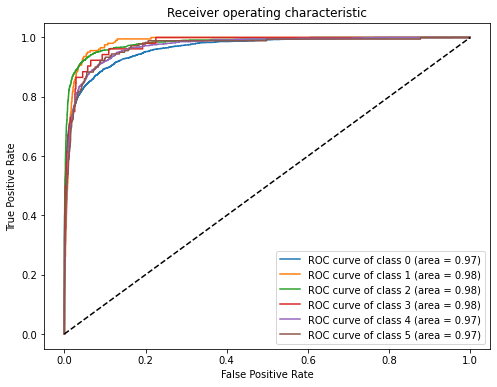

In [64]:
# Computing ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# ROC curve 
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:
# roc_auc_score
ra_score = roc_auc_score(y_test,y_pred_proba,multi_class='ovr')
ra_score

0.9754174489160278

In [66]:
import joblib

# saving the best model for production
joblib.dump(ovr,'Comments_Classifier_Model.obj')

['Comments_Classifier_Model.obj']

## Let's consider Test dataset

In [67]:
# # loading dataset
# test = pd.read_csv('malignant_comments_test.csv', encoding='latin1')
# test

In [68]:
# loading dataset
path = '/content/drive/MyDrive/CSV files/malignant_comments_test.csv'
test = pd.read_csv(path, encoding='latin1')
test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [69]:
# number of rows/instances and columns/features present in the dataset
test.shape

(153164, 2)

In [70]:
# columns names
test.columns

Index(['id', 'comment_text'], dtype='object')

In [71]:
# columns Non-Null Count and DataType
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [72]:
# columns Null Count
test.isnull().sum()

id              0
comment_text    0
dtype: int64

## Data Cleaning

In [73]:
# removing any emojis present in the comment_text
test = test.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [74]:
# converting all 'comments' to lower case
test['comment_text']=test['comment_text'].str.lower()

# replacing 'numbers' (if any) with 'space'
test['comment_text'] = test['comment_text'].str.replace(r'\d+(\.\d+)?', ' ')

# removing punctuation
test['comment_text'] = test['comment_text'].str.replace(r'[^\w\d\s]', '')

# replacing 'wide-space' between words with a single space
test['comment_text'] = test['comment_text'].str.replace(r'\s+', ' ')

# removing 'underscore'
test['comment_text'] = test['comment_text'].str.replace(r'_', '')

# removing leading and trailing wide-space
test['comment_text'] = test['comment_text'].str.replace(r'^\s+|\s+?$', '')

In [75]:
# for analysis purpose only
# checking the 'comment_text' length
test['comment_text_length']=test['comment_text'].str.len()

In [76]:
test.head()

,id,comment_text,comment_text_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then youll ...,355
1,0000247867823ef7,from rfc the title is fine as it is imo,39
2,00013b17ad220c46,sources zawe ashton on lapland,30
3,00017563c3f7919a,if you have a look back at the source the info...,199
4,00017695ad8997eb,i dont anonymously edit articles at all,39


In [77]:
# removing 'stop words' and stemming words using PorterStemmer

test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
                PorterStemmer().stem(words) for words in x.split() 
                if words not in stop_words))

In [78]:
# for analysis purpose only
test['cleaned_comment']=test['comment_text'].str.len()

In [79]:
test.head()

,id,comment_text,comment_text_length,cleaned_comment
0,00001cee341fdb12,yo bitch ja rule succes youll ever what hate s...,355,239
1,0000247867823ef7,rfc titl fine imo,39,17
2,00013b17ad220c46,sourc zaw ashton lapland,30,24
3,00017563c3f7919a,look back sourc inform updat correct form gues...,199,97
4,00017695ad8997eb,dont anonym edit articl,39,23


In [80]:
print('Original Length:',test['comment_text_length'].sum())
print('Cleaned Length :',test['cleaned_comment'].sum())
print('Difference     :',test['comment_text_length'].sum()-test['cleaned_comment'].sum())

Original Length: 50763295
Cleaned Length : 31035676
Difference     : 19727619


## Data Pre-processing

In [81]:
# model object
test_tfidf = TfidfVectorizer(max_features=3000)

# transforming text into features
test_features = test_tfidf.fit_transform(test['comment_text'])

In [82]:
print(len(tf_idf.get_feature_names()),
      len(test_tfidf.get_feature_names()))

3000 3000


In [83]:
# storing it in dataframe
test_set=pd.DataFrame(test_features.todense(),columns=test_tfidf.get_feature_names())
test_set

,abil,abl,abort,absenc,absolut,absurd,abus,academ,academi,accept,access,accid,accident,accomplish,accord,accordingli,account,accur,accuraci,accus,achiev,acknowledg,across,act,action,activ,activist,actor,actual,ad,adam,add,addit,address,adequ,adher,adjust,admin,administr,admit,...,would,wouldnt,wow,wp,wpnpov,wpor,wpr,write,writer,written,wrong,wrote,wtc,wtf,wtfhuh,xlarg,ya,yall,ye,yeah,year,yellow,yesterday,yet,yo,york,youd,youfuck,youi,youll,young,your,youth,youtub,youv,za,zealand,zero,zeuphori,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181028,0.0,0.0,0.0,0.0,0.153071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.085092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [84]:
train_features = set(tf_idf.get_feature_names()) # features used to train and test the models
test_features = set(test_tfidf.get_feature_names())

In [85]:
len(test_features)

3000

In [86]:
# dropping features which are not used to train and test the models
uf = test_features - train_features
test_set.drop(uf,axis=1,inplace=True)

In [87]:
# adding features which were used in training and testing the models
mf = train_features - test_features

for feature in mf:
    test_set[feature]=np.zeros([153164,1])

## Predicting Classes

In [88]:
# Predicting Classes
classes = ovr.predict(test_set)

In [89]:
# storing it in dataframe
cp = pd.DataFrame({'id':test['id'],
                   'malignant':classes[:,0],
                   'highly_malignant':classes[:,1],
                   'rude':classes[:,2],
                   'threat':classes[:,3],
                   'abuse':classes[:,4],
                   'loathe':classes[:,5]})
cp

,id,malignant,highly_malignant,rude,threat,abuse,loathe
0,00001cee341fdb12,0,0,0,0,0,0
1,0000247867823ef7,0,0,0,0,0,0
2,00013b17ad220c46,0,0,0,0,0,0
3,00017563c3f7919a,0,0,0,0,0,0
4,00017695ad8997eb,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0,0,0,0,0,0
153160,fffd7a9a6eb32c16,0,0,0,0,0,0
153161,fffda9e8d6fafa9e,0,0,0,0,0,0
153162,fffe8f1340a79fc2,0,0,0,0,0,0


In [90]:
# saving the predicted classes in a csv file.
cp.to_csv('predicted_classes.csv')